### Church Analytics

#### Basic Data Analysis done with Power BI

in this document:

#### Deeper Analysis using Data Science metrics

- Data Exploration
- Feature Engineering
- Data Splitting

#### Machine Learning

- Models Selection
- Models Trainnig
- Models Evaluation
- Model Deployment
- Models Interpretation
- Communication and Reporting




In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the Excel file into a DataFrame
df = pd.read_excel('ejemplo.xlsx', header=None, names=['Date', 'Name', 'Type', 'Amount'])

# Display the first few rows of the DataFrame
df.head()


,Date,Name,Type,Amount
0,2024-06-01,ANDREA SMITH,Tithe,50
1,2024-06-01,MICHAEL BROWN,Local_Church_Budget,20
2,2024-06-02,SOPHIA JOHNSON,Tithe,150
3,2024-06-02,LIAM WILLIAMS,Local_Church_Building,45
4,2024-06-03,EMMA JONES,Tithe,200


This data is already cleanned, lets proceed

In [29]:
# Drop the 'Date' column
df_summary = df.drop(columns=['Date'])

df_summary.describe()


,Amount
count,94.000000
mean,114.053191
std,90.931780
min,20.000000
25%,50.000000
50%,95.000000
75%,155.000000
max,500.000000


In [30]:
median_amount = df_summary['Amount'].median()
median_amount


95.0

In [31]:
mode_amount = df_summary['Amount'].mode()
mode_amount

0     25
1     60
2     85
3     95
4    200
Name: Amount, dtype: int64

Contributions Count

In [32]:
# Count contributions by type
contributions_by_type = df['Type'].value_counts()

print("Contributions by Type:")
print(contributions_by_type)


Contributions by Type:
Type
Tithe                     68
 Local_Church_Budget      19
 Local_Church_Building     7
Name: count, dtype: int64


In [33]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('ejemplo.xlsx', header=None, names=['Date', 'Name', 'Type', 'Amount'])

# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Calculate median contribution amount for each type
median_per_type = df.groupby('Type')['Amount'].median()

# Display the median contribution amount for each type
print("Median Contribution Amount for Each Type:")
median_per_type.head()


Median Contribution Amount for Each Type:


Type
 Local_Church_Budget       30.0
 Local_Church_Building     45.0
Tithe                     122.5
Name: Amount, dtype: float64

### Contributors by total amount


In [34]:
# Calculate the total amount each person gave
total_per_person = df.groupby('Name')['Amount'].sum().reset_index()

# Sort the data for better readability (optional)
total_per_person = total_per_person.sort_values(by='Amount', ascending=False)

# Display the DataFrame
total_per_person.head(10)



,Name,Amount
53,LIAM WILLIAMS,795
40,JACKSON FLORES,500
43,JACKSON SANDERS,450
68,MASON FOSTER,250
15,BENJAMIN MARTIN,250
51,LIAM BELL,200
11,AUBREY WOODS,200
10,AUBREY GRIFFIN,200
55,LOGAN GREEN,200
29,EMMA JONES,200


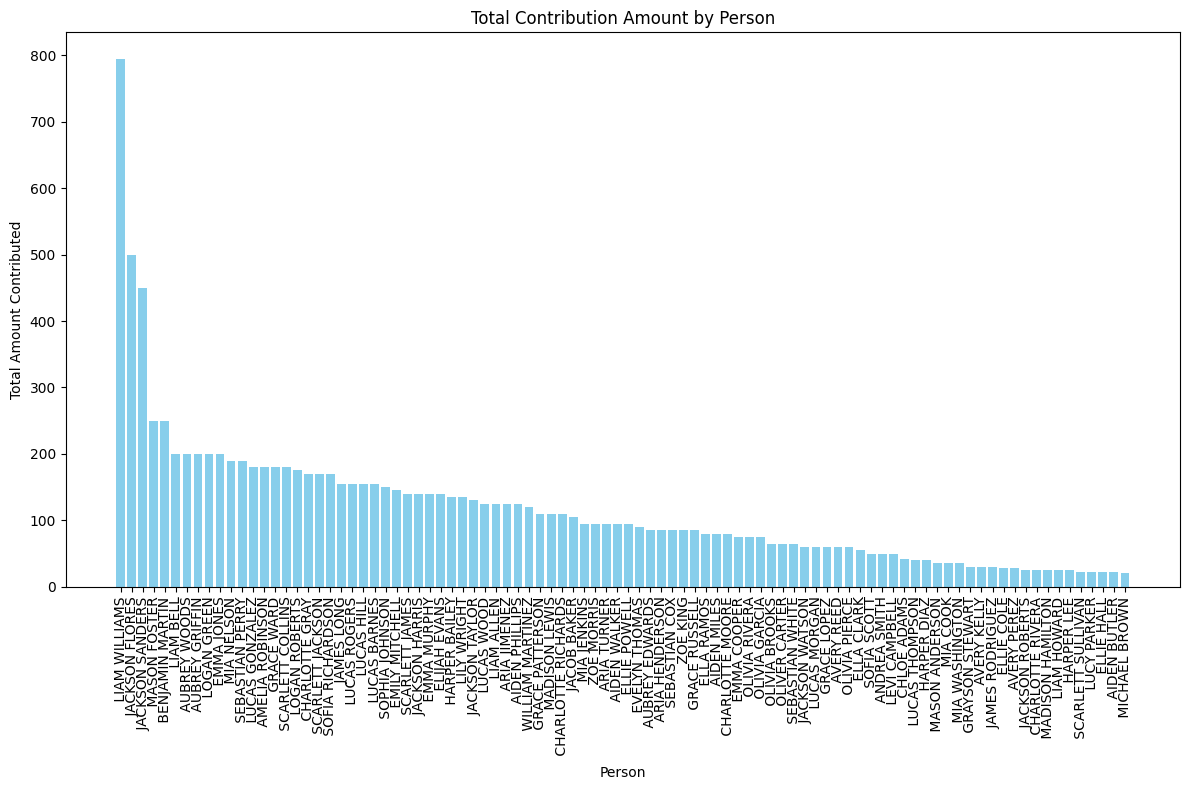

In [35]:
# Calculate total contribution amount per person
total_per_person = df.groupby('Name')['Amount'].sum().reset_index()

# Sort by total contribution amount descending
total_per_person = total_per_person.sort_values(by='Amount', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(total_per_person['Name'], total_per_person['Amount'], color='skyblue')
plt.xlabel('Person')
plt.ylabel('Total Amount Contributed')
plt.title('Total Contribution Amount by Person')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Least givers

In [36]:
total_per_person.tail(10)

,Name,Amount
42,JACKSON ROBERTS,25
19,CHARLOTTE RIVERA,25
65,MADISON HAMILTON,25
52,LIAM HOWARD,25
39,HARPER LEE,25
82,SCARLETT SULLIVAN,22
64,LUCY PARKER,22
25,ELLIE HALL,22
0,AIDEN BUTLER,22
73,MICHAEL BROWN,20


### Disribution by Amount

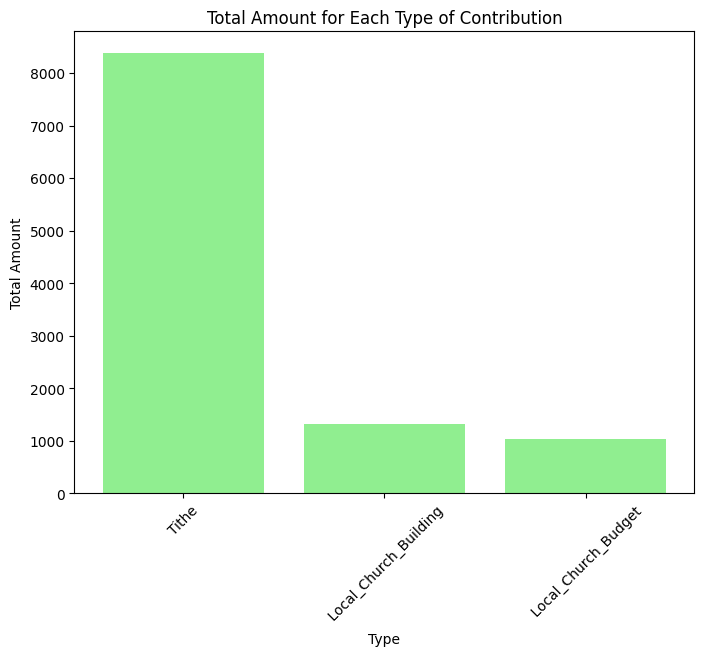

In [37]:
# Calculate the total amount for each type of contribution
total_per_type = df.groupby('Type')['Amount'].sum().reset_index()

# Sort the data for better visualization
total_per_type = total_per_type.sort_values(by='Amount', ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(total_per_type['Type'], total_per_type['Amount'], color='lightgreen')
plt.xlabel('Type')
plt.ylabel('Total Amount')
plt.title('Total Amount for Each Type of Contribution')
plt.xticks(rotation=45)
plt.show()


#### Box-Plot

C:\Users\gabri\AppData\Local\Temp\ipykernel_13524\3274517850.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Amount', data=df, palette='Set2')


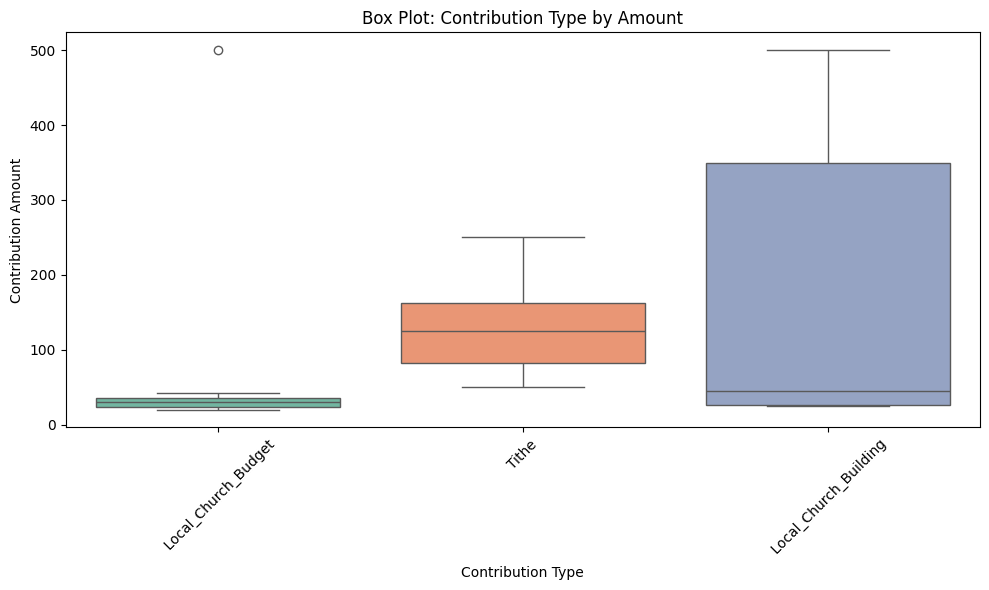

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame from ejemplo.xlsx
df = pd.read_excel('ejemplo.xlsx', names=['Date', 'Name', 'Type', 'Amount'])

# Drop the 'Date' column if not needed for this analysis
df = df.drop(columns=['Date'])

# Plotting a box plot for Type by Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Amount', data=df, palette='Set2')
plt.title('Box Plot: Contribution Type by Amount')
plt.xlabel('Contribution Type')
plt.ylabel('Contribution Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


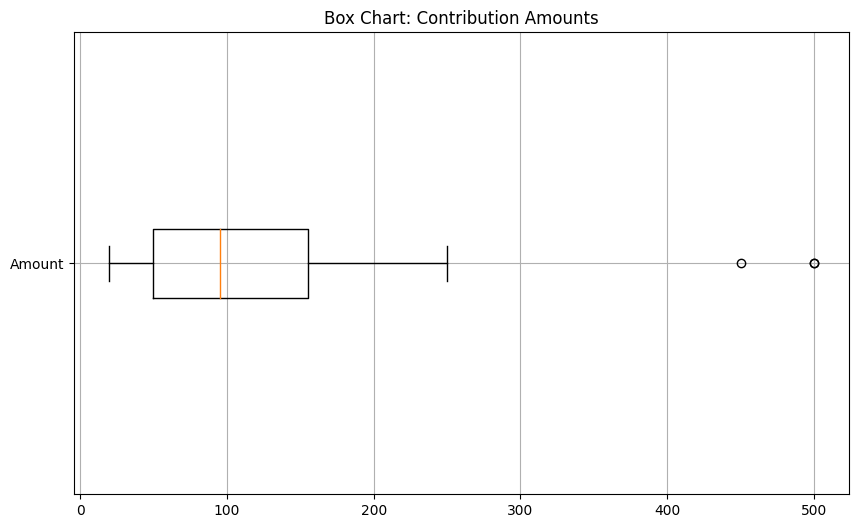

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame loaded from ejemplo.xlsx
df = pd.read_excel('ejemplo.xlsx', names=['Date', 'Name', 'Type', 'Amount'])

# Drop the 'Date' column if not needed for this analysis
df = df.drop(columns=['Date'])

# Assuming 'Amount' column represents contribution amounts

# Plot the box chart for contribution amounts
plt.figure(figsize=(10, 6))
plt.boxplot(df['Amount'], vert=False)
plt.yticks([1], ['Amount'])
plt.title('Box Chart: Contribution Amounts')
plt.grid(True)
plt.show()


### Contributors by Count

In [40]:
# Count contributions per person (Name)
contributors_count = df['Name'].value_counts()

# Display contributors by count
print("Contributors by Count:")
contributors_count.head(10)


Contributors by Count:


Name
 LIAM WILLIAMS       3
 MICHAEL BROWN       1
 AIDEN BUTLER        1
 ELLIE COLE          1
 JACKSON WATSON      1
 AUBREY WOODS        1
 MADISON HAMILTON    1
 ARIA HENDERSON      1
 LUCAS GONZALEZ      1
 MASON FOSTER        1
Name: count, dtype: int64

In [41]:
contributors_count.tail(10)


Name
 GRACE LOPEZ       1
 EMILY MITCHELL    1
 OLIVER CARTER     1
 MIA NELSON        1
 JACOB BAKER       1
 CHLOE ADAMS       1
 LOGAN GREEN       1
 SOFIA SCOTT       1
 LUCAS HILL        1
 OLIVIA PIERCE     1
Name: count, dtype: int64

### Distribution by Count

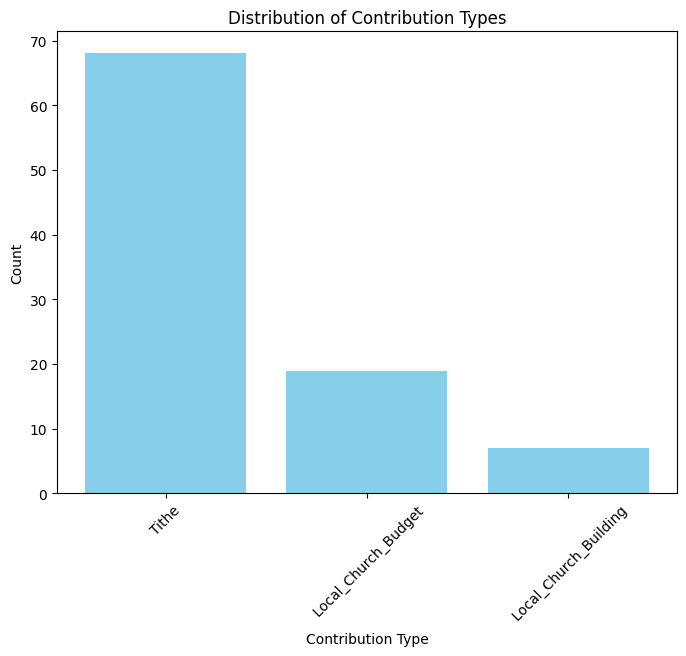

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('ejemplo.xlsx', header=None, names=['Date', 'Name', 'Type', 'Amount'])

# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Count the occurrences of each contribution type
type_counts = df['Type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values, color='skyblue')
plt.xlabel('Contribution Type')
plt.ylabel('Count')
plt.title('Distribution of Contribution Types')
plt.xticks(rotation=45)
plt.show()



### Percentiles Box chart


### Distribution concentration

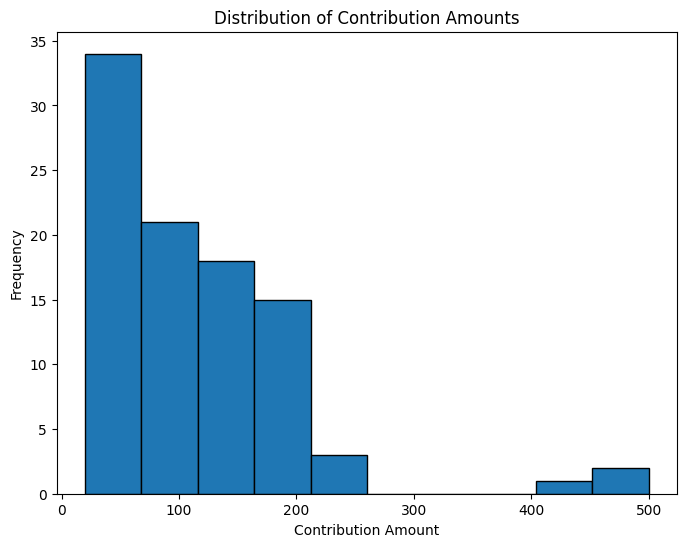

In [43]:
import matplotlib.pyplot as plt

# Plot a histogram of contributions
plt.figure(figsize=(8, 6))
plt.hist(df['Amount'], bins=10, edgecolor='black')
plt.xlabel('Contribution Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Contribution Amounts')
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_13524\2341507330.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Amount'], color='red', shade=True)


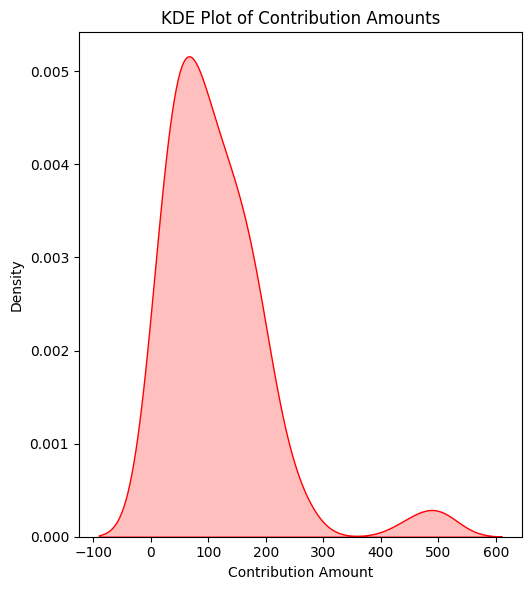

In [44]:
# Plotting histograms and KDE
plt.figure(figsize=(10, 6))

# KDE plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.kdeplot(df['Amount'], color='red', shade=True)
plt.xlabel('Contribution Amount')
plt.ylabel('Density')
plt.title('KDE Plot of Contribution Amounts')

plt.tight_layout()
plt.show()


### Average Contribution by Person


In [45]:
# Calculate contribution statistics by person
person_stats = df.groupby('Name')['Amount'].agg(['mean', 'median', 'min', 'max'])

# Sort by a specific statistic (e.g., 'mean' contribution amount)
person_stats_sorted = person_stats.sort_values(by='mean', ascending=False)

print("Contribution Statistics by Person (Sorted by Mean Contribution):")
person_stats_sorted.head(20)


Contribution Statistics by Person (Sorted by Mean Contribution):


,mean,median,min,max
Name,,,,
JACKSON FLORES,500.0,500.0,500,500
JACKSON SANDERS,450.0,450.0,450,450
LIAM WILLIAMS,265.0,250.0,45,500
MASON FOSTER,250.0,250.0,250,250
BENJAMIN MARTIN,250.0,250.0,250,250
LIAM BELL,200.0,200.0,200,200
AUBREY WOODS,200.0,200.0,200,200
AUBREY GRIFFIN,200.0,200.0,200,200
LOGAN GREEN,200.0,200.0,200,200


### Correlation between Types and Names

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Create a cross-tabulation (contingency table) between 'Name' and 'Type'
cross_tab = pd.crosstab(df['Name'], df['Type'])

# Display the cross-tabulation
print("Cross-Tabulation (Contingency Table) between Name and Type:")
print(cross_tab)

# Calculate Cramér's V statistic for categorical association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V statistic between 'Name' and 'Type'
cramers_v_stat = cramers_v(df['Name'], df['Type'])
cramers_v_stat


Cross-Tabulation (Contingency Table) between Name and Type:
Type                Local_Church_Budget   Local_Church_Building  Tithe
Name                                                                  
 AIDEN BUTLER                         1                       0      0
 AIDEN MILES                          0                       0      1
 AIDEN PHILLIPS                       0                       0      1
 AIDEN WALKER                         0                       0      1
 AMELIA ROBINSON                      0                       0      1
...                                 ...                     ...    ...
 SOFIA SCOTT                          0                       0      1
 SOPHIA JOHNSON                       0                       0      1
 WILLIAM MARTINEZ                     0                       0      1
 ZOE KING                             0                       0      1
 ZOE MORRIS                           0                       0      1

[92 rows x 3 col

0.0

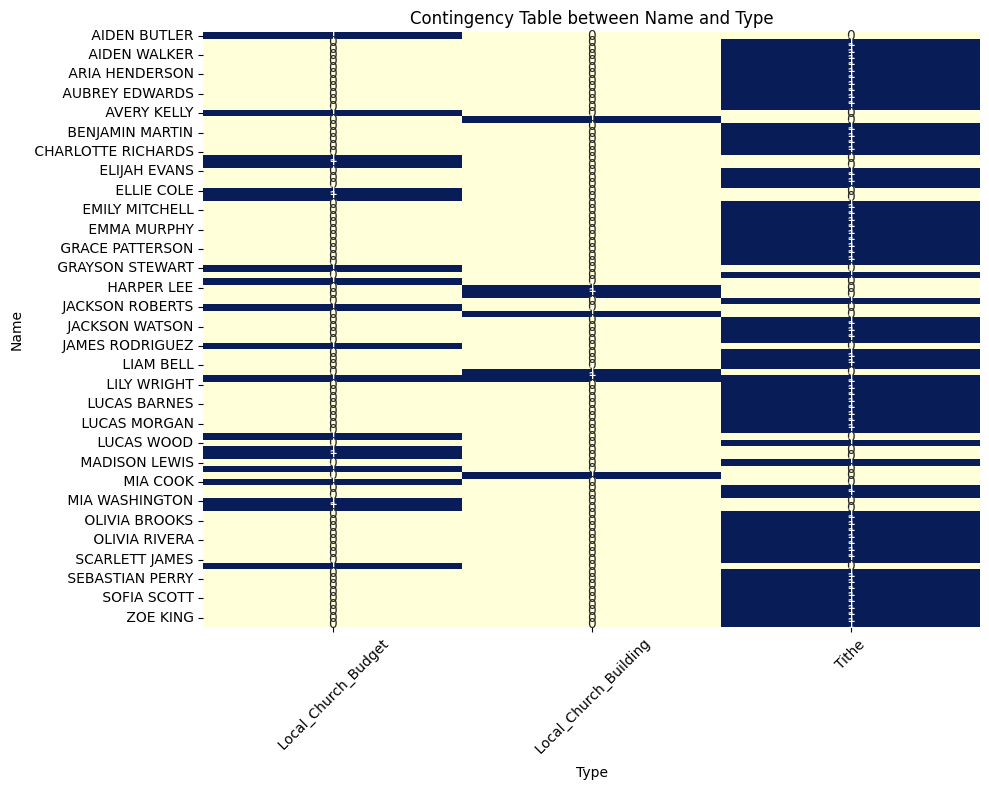


Cramér's V statistic: 0.0


In [47]:
import seaborn as sns


# Plotting the heatmap of the contingency table
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', cbar=False, fmt='d')
plt.title('Contingency Table between Name and Type')
plt.xlabel('Type')
plt.ylabel('Name')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\nCramér's V statistic: {cramers_v_stat}")

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\gabri\AppData\Local\Programs\Python\P

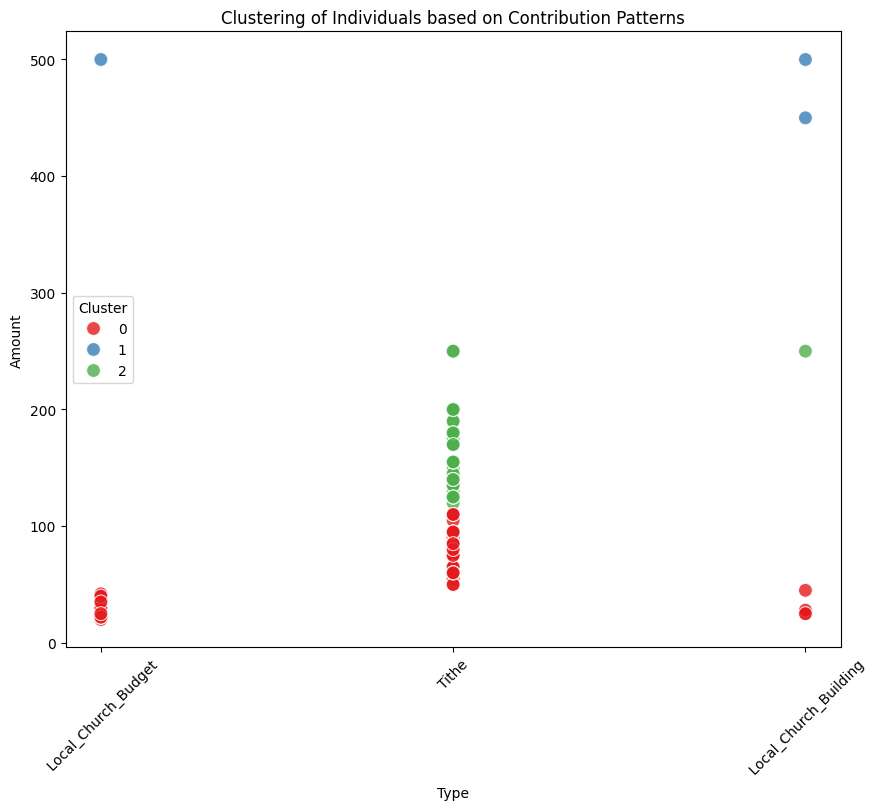

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load ejemplo.xlsx into a DataFrame
df = pd.read_excel('ejemplo.xlsx', names=['Date', 'Name', 'Type', 'Amount'])

# Drop the 'Date' column if not needed for clustering
df = df.drop(columns=['Date'])

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Amount']])

# Apply KMeans clustering with 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters with Amount on y-axis and Type on x-axis
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Type', y='Amount', hue='Cluster', data=df, palette='Set1', s=100, alpha=0.8)
plt.title('Clustering of Individuals based on Contribution Patterns')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.legend(title='Cluster')
plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better visibility
plt.show()


### Model Deployment

#### Goal: Predict next month bank statement

I took 6 Machine Learning Algorithms and evaluate them to explore which one fits the model the most

- Linerar Regression
- Random Forest Regressor
- Gradient Boost Regressor
- SVR
- Neural Network
- LightGBM Regressor

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_excel('ejemplo.xlsx', names=['Date', 'Name', 'Type', 'Amount'])
df['Date'] = pd.to_datetime(df['Date'])

# Sum the amount to have no duplicate dates
daily_data = df.groupby('Date').sum().reset_index()

# Feature Engineering
daily_data['Day'] = daily_data['Date'].dt.day

X = daily_data[['Day']]
y = daily_data['Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Model evaluation. 

And appended them together to have a better comparison

In [ ]:


def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f'{model_name}:')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')
    
    # Predict amounts for each day of the next month
    next_month_days = np.arange(1, 31).reshape(-1, 1)
    next_month_predictions = model.predict(next_month_days)
    total_next_month_amount = next_month_predictions.sum()
    print(f'Total predicted amount for the next month: {total_next_month_amount}\n')
    
    return {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R-squared': r2,
        'Total Next Month Amount': total_next_month_amount
    }

results = []

# Linear Regression
model_lr = LinearRegression()
results.append(evaluate_model(model_lr, 'Linear Regression', X_train, X_test, y_train, y_test))

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
results.append(evaluate_model(model_rf, 'Random Forest', X_train, X_test, y_train, y_test))

# SVR
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
results.append(evaluate_model(model_svr, 'SVR', X_train, X_test, y_train, y_test))

# Gradient Boosting
model_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
results.append(evaluate_model(model_gbr, 'Gradient Boosting', X_train, X_test, y_train, y_test))

# Neural Network
model_nn = MLPRegressor(hidden_layer_sizes=(50, 25, 10), max_iter=1000, random_state=42)
results.append(evaluate_model(model_nn, 'Neural Network', X_train, X_test, y_train, y_test))

# LightGBM
model_lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
results.append(evaluate_model(model_lgbm, 'LightGBM', X_train, X_test, y_train, y_test))

# Create results DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df


### Theory

MAE and RMSE: Lower values of MAE and RMSE indicate better model accuracy. Therefore, among models being compared, the one with the lowest MAE and RMSE is generally considered more accurate in predicting the target variable.

R-squared (R2): A higher R2 score closer to 1 indicates that a larger proportion of the variance in the target variable is predictable from the independent variables. A negative R2 score (as seen in some models) indicates that the model does not perform well and might even perform worse than a naive baseline model.

### Conclusion

MAE and RMSE: The SVR model has the lowest MAE (62.63) and RMSE (69.94), indicating it might be the most accurate model among those evaluated based on these metrics.

R-squared (R2): However, considering R-squared values, none of the models have a positive R2 score, indicating that they do not explain the variance in the target variable well. The models with less negative R2 scores (closer to zero) might be performing relatively better, but they still indicate poor model fit.

### Predicting Date and Amount given a Name

This progragm prompt a list of people from the dataset where I get to pick one by their number assigned, store it in a csv file for future uses

Then predicts a future giving from this person

This time I used Tensorflow and a Neuronal Network with OneHotEncoding... Lets see the results


In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import OneHotEncoder

# Load the dataset (replace 'ejemplo.xlsx' with your actual file path)
df = pd.read_excel('ejemplo.xlsx', header=None, names=['Date', 'Name', 'Type', 'Amount'])

# Convert names to uppercase
df['Name'] = df['Name'].str.upper()

# Create a mapping of numbers to names
names = df['Name'].unique()
name_to_number = {name: i for i, name in enumerate(names)}
number_to_name = {i: name for i, name in enumerate(names)}

# Print the mapping for reference
print("Number to Name Mapping:")
for number, name in number_to_name.items():
    print(f"{number}: {name}")

# Save the mapping to a CSV file
mapping_df = pd.DataFrame(list(name_to_number.items()), columns=['Name', 'Number'])
mapping_df.to_csv('number_to_names.csv', index=False)

print("Mapping saved to number_to_names.csv")



Number to Name Mapping:
0:  ANDREA SMITH
1:  MICHAEL BROWN
2:  SOPHIA JOHNSON
3:  LIAM WILLIAMS
4:  EMMA JONES
5:  OLIVIA GARCIA
6:  WILLIAM MARTINEZ
7:  JAMES RODRIGUEZ
8:  BENJAMIN MARTIN
9:  LUCAS THOMPSON
10:  CHARLOTTE MOORE
11:  JACKSON TAYLOR
12:  MASON ANDERSON
13:  EVELYN THOMAS
14:  SCARLETT JACKSON
15:  SEBASTIAN WHITE
16:  HARPER LEE
17:  JACKSON HARRIS
18:  ELLA CLARK
19:  MADISON LEWIS
20:  AMELIA ROBINSON
21:  AIDEN WALKER
22:  ELLIE HALL
23:  LIAM ALLEN
24:  ZOE KING
25:  LILY WRIGHT
26:  GRACE LOPEZ
27:  LUCAS HILL
28:  SOFIA SCOTT
29:  LOGAN GREEN
30:  CHLOE ADAMS
31:  JACOB BAKER
32:  MIA NELSON
33:  OLIVER CARTER
34:  EMILY MITCHELL
35:  AVERY PEREZ
36:  LOGAN ROBERTS
37:  ARIA TURNER
38:  AIDEN PHILLIPS
39:  LEVI CAMPBELL
40:  LUCY PARKER
41:  ELIJAH EVANS
42:  AUBREY EDWARDS
43:  SCARLETT COLLINS
44:  GRAYSON STEWART
45:  ZOE MORRIS
46:  LUCAS ROGERS
47:  AVERY REED
48:  MIA COOK
49:  LIAM BELL
50:  EMMA COOPER
51:  HARPER BAILEY
52:  CHARLOTTE RIVERA
53:  SOFIA R

In [70]:
# Preprocess the data
# Encode categorical variables (Name and Type) using OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_categorical = encoder.fit_transform(df[['Name', 'Type']])

# Combine encoded categorical features with numerical features (if any)
# For simplicity, we'll just use 'Name' for prediction based on its encoded form
X = X_categorical
y_amount = df['Amount']
y_date = df['Date']  

# Define a neural network model to predict Amount
model_amount = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for predicting Amount
])

# Compile the amount prediction model
model_amount.compile(optimizer='adam', loss='mse')

# Train the amount prediction model
model_amount.fit(X, y_amount, epochs=50, batch_size=32, validation_split=0.2)

# Define a neural network model to predict Date
model_date = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for predicting Date (assuming regression for date)
])

# Compile the date prediction model
model_date.compile(optimizer='adam', loss='mse')

# Convert dates to ordinal values for training (optional step depending on your date format)
y_date_ordinal = y_date.apply(lambda x: x.toordinal())

# Train the date prediction model
model_date.fit(X, y_date_ordinal, epochs=50, batch_size=32, validation_split=0.2)

# Example of making predictions based on user input
# Prompt the user to enter a number corresponding to a name
user_number = int(input(f"Enter a number (0-{len(number_to_name)-1}): "))
user_name = number_to_name[user_number]

# Preprocess user input (encode using the same encoder)
# For simplicity, assume 'user_name' matches an existing category in the dataset
user_input_encoded = encoder.transform([[user_name, '']])

# Predict Amount
predicted_amount = model_amount.predict(user_input_encoded)[0][0]

# Predict Date (convert back from ordinal to datetime)
predicted_date_ordinal = model_date.predict(user_input_encoded)[0][0]
predicted_date = pd.to_datetime(predicted_date_ordinal)

# Print the predicted results
print()
print(f"Predicted Amount for {user_name}: {predicted_amount}")
print(f"Predicted Date for {user_name}: {predicted_date}")

Epoch 1/50


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


3/3 [==============================] - 1s 50ms/step - loss: 16467.0898 - val_loss: 39807.5117
Epoch 2/50
3/3 [==============================] - 0s 15ms/step - loss: 16451.0762 - val_loss: 39789.0938
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 16436.5996 - val_loss: 39770.9062
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 16422.4922 - val_loss: 39752.7969
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 16407.9824 - val_loss: 39734.4375
Epoch 6/50
3/3 [==============================] - 0s 14ms/step - loss: 16393.0918 - val_loss: 39715.0273
Epoch 7/50
3/3 [==============================] - 0s 9ms/step - loss: 16377.8633 - val_loss: 39693.7344
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: 16361.6846 - val_loss: 39671.5508
Epoch 9/50
3/3 [==============================] - 0s 12ms/step - loss: 16343.5820 - val_loss: 39647.5117
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


#### But Decission Trees seems to fit better for this task

- Added prediction for the Type as well



In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the name-to-number mapping from the CSV file
mapping_df = pd.read_csv('number_to_names.csv')
name_to_id = dict(zip(mapping_df['Name'], mapping_df['Number']))

# Load the dataset
df = pd.read_excel('ejemplo.xlsx', header=None, names=['Date', 'Name', 'Type', 'Amount'])

# Convert names to uppercase to match the mapping
df['Name'] = df['Name'].str.upper()

# Add a new column 'Name_ID' with numerical IDs using the mapping
df['Name_ID'] = df['Name'].map(name_to_id)



In [74]:
# Prepare features (X) and targets (y)
X = df[['Name_ID']].values
y_date = df['Date'].values
y_type = df['Type'].values
y_amount = df['Amount'].values

# Split the data into training and testing sets
X_train, X_test, y_date_train, y_date_test, y_type_train, y_type_test, y_amount_train, y_amount_test = train_test_split(
    X, y_date, y_type, y_amount, test_size=0.2, random_state=42)

# Define and train the decision tree model for each target separately
date_model = DecisionTreeClassifier()
date_model.fit(X_train, y_date_train)

type_model = DecisionTreeClassifier()
type_model.fit(X_train, y_type_train)

amount_model = DecisionTreeClassifier()
amount_model.fit(X_train, y_amount_train)

# Function to predict Date, Type, and Amount based on Name
def predict_donation_details(name):
    name = name.upper()  # Convert the input name to uppercase
    name_id = name_to_id.get(name, -1)  # Get numerical ID for the name or -1 if not found
    
    if name_id == -1:
        return "Name not found in dataset"
    
    predicted_date = date_model.predict([[name_id]])[0]
    predicted_type = type_model.predict([[name_id]])[0]
    predicted_amount = amount_model.predict([[name_id]])[0]
    
    return {
        'Predicted Date': predicted_date,
        'Predicted Type': predicted_type,
        'Predicted Amount': predicted_amount
    }

# Example usage:
print("Open the CSV to see the people")

selected_idx = int(input("Select a number corresponding to the person: "))
selected_name = name_list[selected_idx]

prediction = predict_donation_details(selected_name)
print(f"\nPrediction for {selected_name}:")
print(prediction)

Open the CSV to see the people

Prediction for  ANDREA SMITH:
{'Predicted Date': numpy.datetime64('2024-06-01T00:00:00.000000000'), 'Predicted Type': ' Local_Church_Budget', 'Predicted Amount': 20}
